In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose([
	transforms.Grayscale(num_output_channels = 1),
	transforms.ToTensor()
])

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
											download=True, transform=transform)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
											download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
train_loader = DataLoader(dataset=dataset_train, batch_size = 200, shuffle=True)
test_loader = DataLoader(dataset=dataset_test, shuffle=False)

In [0]:
class MLP(nn.Module):
  def __init__(self, n_hidden_nodes, n_hidden_layers):
    super(MLP, self).__init__()
    self.n_hidden_nodes = n_hidden_nodes
    self.n_hidden_layers = n_hidden_layers
    
    self.fc1 = nn.Linear(32*32, n_hidden_nodes)
    self.fc1_drop = nn.Dropout(0.5)
    if n_hidden_layers == 2:
      self.fc2 = nn.Linear(n_hidden_nodes, n_hidden_nodes)
      self.fc2_drop = nn.Dropout(0.5)
      
    self.out = nn.Linear(n_hidden_nodes, 10)
    self.activation_function = nn.ReLU()
    
  def forward(self, x):
    x = x.view(-1, 32*32)
    x = self.activation_function(self.fc1(x))
    x = self.fc1_drop(x)
    if self.n_hidden_layers == 2:
      x = self.activation_function(self.fc2(x))
      x = self.fc2_drop(x)
    x = self.activation_function(self.out(x))
    return x

In [0]:
mlp = MLP(20, 1) #MLP 1 hidden layer com 20 hidden node
optimizer = torch.optim.SGD(mlp.parameters(), lr = 0.01, momentum=0.1)
loss_fn = torch.nn.CrossEntropyLoss()

In [0]:
def train_model(epochs, train_dataset, model, loss_vector, accuracy_vector):
  correct = 0
  model.train()
  for i, (img, labels) in enumerate(train_dataset, 0):
      optimizer.zero_grad()
      output = model(img)
      loss = loss_fn(output, labels)
      loss_vector.append(loss)
      loss.backward()
      optimizer.step()
      
      model.eval()
      output = model(img)
      _, pred = torch.max(output.data, 1)
      correct += (pred == labels).sum().item()
  
  accuracy = 100 * correct / len(train_dataset.dataset)
  accuracy_vector.append(accuracy)
  print('Train Epoch: {}\t Accuracy: {}/{} [{}%]'.format(epochs, correct, len(train_dataset.dataset), accuracy))

In [0]:
def test(model, test_loader):
  correct = 0
  for img, label in test_loader:
    output = model(img)
    _, pred = torch.max(output.data, 1)
    correct += (pred == label).sum().item()
  
  accuracy = 100 * correct / len(test_loader.dataset)
  print('\nTest: \tAccuracy: {}/{} ({}%)\n'.format(correct, len(test_loader.dataset), accuracy))

In [0]:
loss_vector = []
accuracy_vector = []
for epoch in range(100):
  train_model(epoch, train_loader, mlp, loss_vector, accuracy_vector)

Train Epoch: 0	 Accuracy: 7944/50000 [15.888%]
Train Epoch: 1	 Accuracy: 9609/50000 [19.218%]
Train Epoch: 2	 Accuracy: 10856/50000 [21.712%]
Train Epoch: 3	 Accuracy: 11540/50000 [23.08%]
Train Epoch: 4	 Accuracy: 11863/50000 [23.726%]
Train Epoch: 5	 Accuracy: 12218/50000 [24.436%]
Train Epoch: 6	 Accuracy: 12406/50000 [24.812%]
Train Epoch: 7	 Accuracy: 12703/50000 [25.406%]
Train Epoch: 8	 Accuracy: 12780/50000 [25.56%]
Train Epoch: 9	 Accuracy: 12966/50000 [25.932%]
Train Epoch: 10	 Accuracy: 13051/50000 [26.102%]
Train Epoch: 11	 Accuracy: 13156/50000 [26.312%]
Train Epoch: 12	 Accuracy: 13213/50000 [26.426%]
Train Epoch: 13	 Accuracy: 13281/50000 [26.562%]
Train Epoch: 14	 Accuracy: 13409/50000 [26.818%]
Train Epoch: 15	 Accuracy: 13446/50000 [26.892%]
Train Epoch: 16	 Accuracy: 13505/50000 [27.01%]
Train Epoch: 17	 Accuracy: 13538/50000 [27.076%]
Train Epoch: 18	 Accuracy: 13654/50000 [27.308%]
Train Epoch: 19	 Accuracy: 13697/50000 [27.394%]
Train Epoch: 20	 Accuracy: 13799/50


Test: 	Accuracy: 3689/10000 (36.89%)



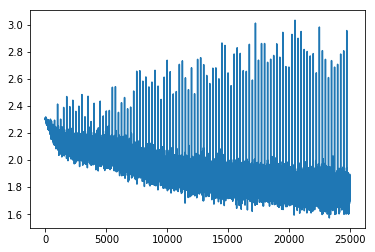

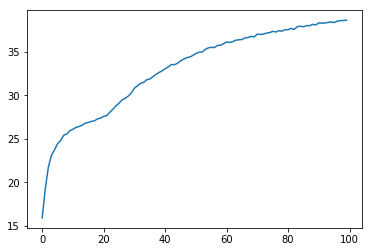

In [0]:
test(mlp, test_loader)

plt.plot(loss_vector)
plt.show()

plt.plot(accuracy_vector)
plt.show()

#Discussão


*   A classe MLP é configurável. Pode-se decidir entre 1 ou 2 camadas ocultas, e a quantidade de neuronios em cada uma delas. Em cada camada, tem a função Dropout.
*   Consegue-se observar uma melhora significativa do perceptron, já que esse ultimo teve uma acurácia de 12%.
*   A divisa de treinamento e validação, com as mesmas configurações, resultou em um resultado de 13% em 200 épocas. Por isso, não foi divido para melhor análise de loss.
*   Utilizando 2 camadas, o treinamento me deu a informação de loss e acurácia mais rápido, porem demorou bem mais para ter uma taxa de acerto boa. Precisaria de mais épocas para ter resultados bons.
